<a href="https://colab.research.google.com/github/srilaadebnath/ML_LAB_CODES/blob/main/question9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, auc
)

In [ ]:
data = pd.read_csv("samples_cancer.csv")

print("First 10 rows:\n", data.head(10))
print("\nDataset Info:")
data.info()

if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)
data['BareNuc'] = pd.to_numeric(data['BareNuc'], errors='coerce')
data.dropna(inplace=True)


First 10 rows:
         ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   
5  1017122      8        10         10        8            7      10   
6  1018099      1         1          1        1            2      10   
7  1018561      2         1          2        1            2       1   
8  1033078      2         1          1        1            2       1   
9  1033078      4         2          1        1            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4

In [ ]:
X = data.drop(['Class'], axis=1)
y = data['Class']

y = y.map({2: 0, 4: 1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = {}

In [ ]:
for kernel in kernels:
    print(f"\n---- SVM with {kernel.upper()} Kernel ----")
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jacc = jaccard_score(y_test, y_pred)
    err = 1 - acc
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {acc:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"Precision: {pre:.3f}")
    print(f"F1-Score: {f1:.3f}")
    print(f"Jaccard Score: {jacc:.3f}")
    print(f"Error Rate: {err:.3f}")
    print("Confusion Matrix:\n", cm)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    results[kernel] = {
        'fpr': fpr, 'tpr': tpr, 'auc': roc_auc,
        'accuracy': acc, 'recall': rec, 'precision': pre,
        'f1': f1, 'jaccard': jacc, 'error': err, 'cm': cm
    }


---- SVM with LINEAR Kernel ----
Accuracy: 0.956
Recall: 0.958
Precision: 0.920
F1-Score: 0.939
Jaccard Score: 0.885
Error Rate: 0.044
Confusion Matrix:
 [[85  4]
 [ 2 46]]

---- SVM with POLY Kernel ----
Accuracy: 0.956
Recall: 0.917
Precision: 0.957
F1-Score: 0.936
Jaccard Score: 0.880
Error Rate: 0.044
Confusion Matrix:
 [[87  2]
 [ 4 44]]

---- SVM with RBF Kernel ----
Accuracy: 0.964
Recall: 0.979
Precision: 0.922
F1-Score: 0.949
Jaccard Score: 0.904
Error Rate: 0.036
Confusion Matrix:
 [[85  4]
 [ 1 47]]

---- SVM with SIGMOID Kernel ----
Accuracy: 0.942
Recall: 0.917
Precision: 0.917
F1-Score: 0.917
Jaccard Score: 0.846
Error Rate: 0.058
Confusion Matrix:
 [[85  4]
 [ 4 44]]


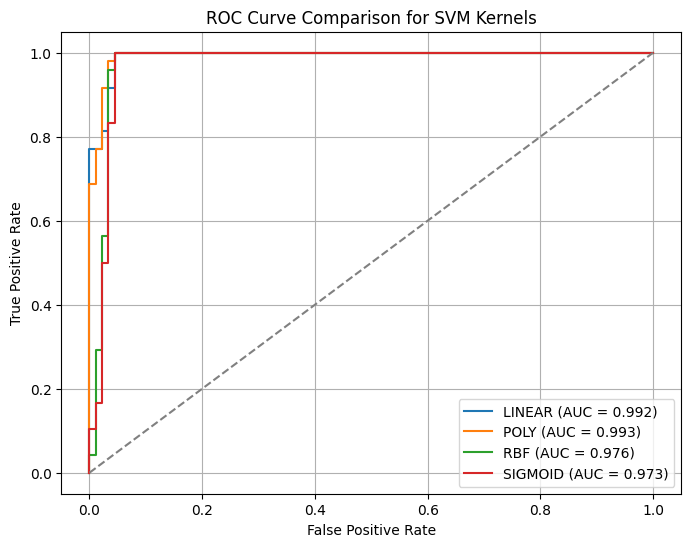

In [ ]:
plt.figure(figsize=(8, 6))
for kernel in kernels:
    plt.plot(results[kernel]['fpr'], results[kernel]['tpr'],
             label=f"{kernel.upper()} (AUC = {results[kernel]['auc']:.3f})")

plt.plot([0, 1], [0, 1], '--', color='gray')
plt.title("ROC Curve Comparison for SVM Kernels")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()